In [7]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch import nn

In [8]:
# CREATING DATA AND TRAIN TEST SPLIT

# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

In [9]:
# Creating the Model

# Creating a linear regression model class
class LinearRegressionModel(nn.Module):
  # Creating constructor
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                            dtype = torch.float), # <- PyTorch loves float32 by default
                                            requires_grad = True) # by default is also true
    self.bias = nn.Parameter(torch.randn(1,
                                         dtype = torch.float), # <- PyTorch loves float32 by default
                                          requires_grad = True)

    # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias # this is the linear regression formula


torch.manual_seed(42) # we'll get the same initial values when using seed
model_0 = LinearRegressionModel() # calling the class


# Defining the loss function and Optimizer

loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

# Lesson 51 - Testing Loop

- When parameters in our model have *requires_grad=True*, pytorch will keep track of the gradients and use them in loss.backward() and optimizer.step()
- But we only need these 2 during training - when model is learning
- for testing we are just evaluating the parameters/patterns our model has learned on the training dataset

### In Testing mode we do the following steps:
1. Do the forward pass of the **test** data
2. Calculate the loss of the **test** data
<br>
- Model learns patterns on the training data and evaluates the patters which it has learned on the testing data - data it has never seen before

In [11]:
torch.manual_seed(42)

epochs = 100 # hyperparameter

# 1. Loop through the data
for epoch in range(epochs):
  # setting the model in training mode
  model_0.train()  # ----->>>>>>> train mode in PyTorch sets all parameters that require gradients to require gradients

  # 2. Forward pass
  y_pred = model_0(X_train)

  # 3. Calculate the loss
  loss = loss_fn(y_pred, y_train) # predictions, labels
  print(f"Loss: {loss}")

  # 4. Optimizer 0 grad
  optimizer.zero_grad()

  # 5. Perform backpropagation on the loss wrt parameters of the model
  loss.backward()

  # 6. Step the optimizer (perform gradient descent)
  optimizer.step()                  # it accumilates the value that it's supposed to change through the loop


  # Testing
  model_0.eval()  # Evaluation mode: Turns off different settings in the model not needed for evaluation/testing purposes (dropout/batch normalization)

  with torch.inference_mode(): # turns off gradient tracking + other things - to make te code faster
    # 1. Forward pass
    test_pred = model_0(X_test)

    # 2. Calculate loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch %10 ==0: # not printing what's happening in every epoch
    print(f"Epoch: {epoch} | Test: {loss} | {test_loss}")
    print(model_0.state_dict())


Loss: 0.3013603389263153
Epoch: 0 | Test: 0.3013603389263153 | 0.4675942063331604
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
Loss: 0.28983935713768005
Loss: 0.2783183455467224
Loss: 0.26679736375808716
Loss: 0.2552763521671295
Loss: 0.24375534057617188
Loss: 0.23223432898521423
Loss: 0.22071333229541779
Loss: 0.20919232070446014
Loss: 0.1976713240146637
Loss: 0.18615034222602844
Epoch: 10 | Test: 0.18615034222602844 | 0.3328842222690582
OrderedDict([('weights', tensor([0.3835])), ('bias', tensor([0.2488]))])
Loss: 0.1746293306350708
Loss: 0.16310831904411316
Loss: 0.1515873372554779
Loss: 0.14006635546684265
Loss: 0.1285453587770462
Loss: 0.11702437698841095
Loss: 0.1060912236571312
Loss: 0.09681284427642822
Loss: 0.08908725529909134
Loss: 0.08227583020925522
Epoch: 20 | Test: 0.08227583020925522 | 0.2069590985774994
OrderedDict([('weights', tensor([0.4222])), ('bias', tensor([0.3403]))])
Loss: 0.07638873159885406
Loss: 0.07160007208585739
Loss: 0.06747635

In [12]:
# running for another 100 epochs

torch.manual_seed(42)

epochs = 100 # hyperparameter

# 1. Loop through the data
for epoch in range(epochs):
  # setting the model in training mode
  model_0.train()  # ----->>>>>>> train mode in PyTorch sets all parameters that require gradients to require gradients

  # 2. Forward pass
  y_pred = model_0(X_train)

  # 3. Calculate the loss
  loss = loss_fn(y_pred, y_train) # predictions, labels
  print(f"Loss: {loss}")

  # 4. Optimizer 0 grad
  optimizer.zero_grad()

  # 5. Perform backpropagation on the loss wrt parameters of the model
  loss.backward()

  # 6. Step the optimizer (perform gradient descent)
  optimizer.step()                  # it accumilates the value that it's supposed to change through the loop


  # Testing
  model_0.eval()  # Evaluation mode: Turns off different settings in the model not needed for evaluation/testing purposes (dropout/batch normalization)

  with torch.inference_mode(): # turns off gradient tracking + other things - to make te code faster
    # 1. Forward pass
    test_pred = model_0(X_test)

    # 2. Calculate loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch %10 ==0: # not printing what's happening in every epoch
    print(f"Epoch: {epoch} | Test: {loss} | {test_loss}")
    print(model_0.state_dict())


Loss: 0.024110013619065285
Epoch: 0 | Test: 0.024110013619065285 | 0.05536102131009102
OrderedDict([('weights', tensor([0.5818])), ('bias', tensor([0.3498]))])
Loss: 0.02376994863152504
Loss: 0.02342480979859829
Loss: 0.023080935701727867
Loss: 0.022739607840776443
Loss: 0.022391926497220993
Loss: 0.022054409608244896
Loss: 0.02170540764927864
Loss: 0.021366719156503677
Loss: 0.021020207554101944
Loss: 0.020677709951996803
Epoch: 10 | Test: 0.020677709951996803 | 0.04777535796165466
OrderedDict([('weights', tensor([0.5988])), ('bias', tensor([0.3423]))])
Loss: 0.02033500373363495
Loss: 0.01998869702219963
Loss: 0.019649803638458252
Loss: 0.019300809130072594
Loss: 0.018963487818837166
Loss: 0.01861560344696045
Loss: 0.018274478614330292
Loss: 0.017930403351783752
Loss: 0.01758546568453312
Loss: 0.017245199531316757
Epoch: 20 | Test: 0.017245199531316757 | 0.0395028181374073
OrderedDict([('weights', tensor([0.6159])), ('bias', tensor([0.3353]))])
Loss: 0.016896454617381096
Loss: 0.01656

In [13]:
weight, bias

(0.7, 0.3)

- so after 200 epochs our parameters are close to true values

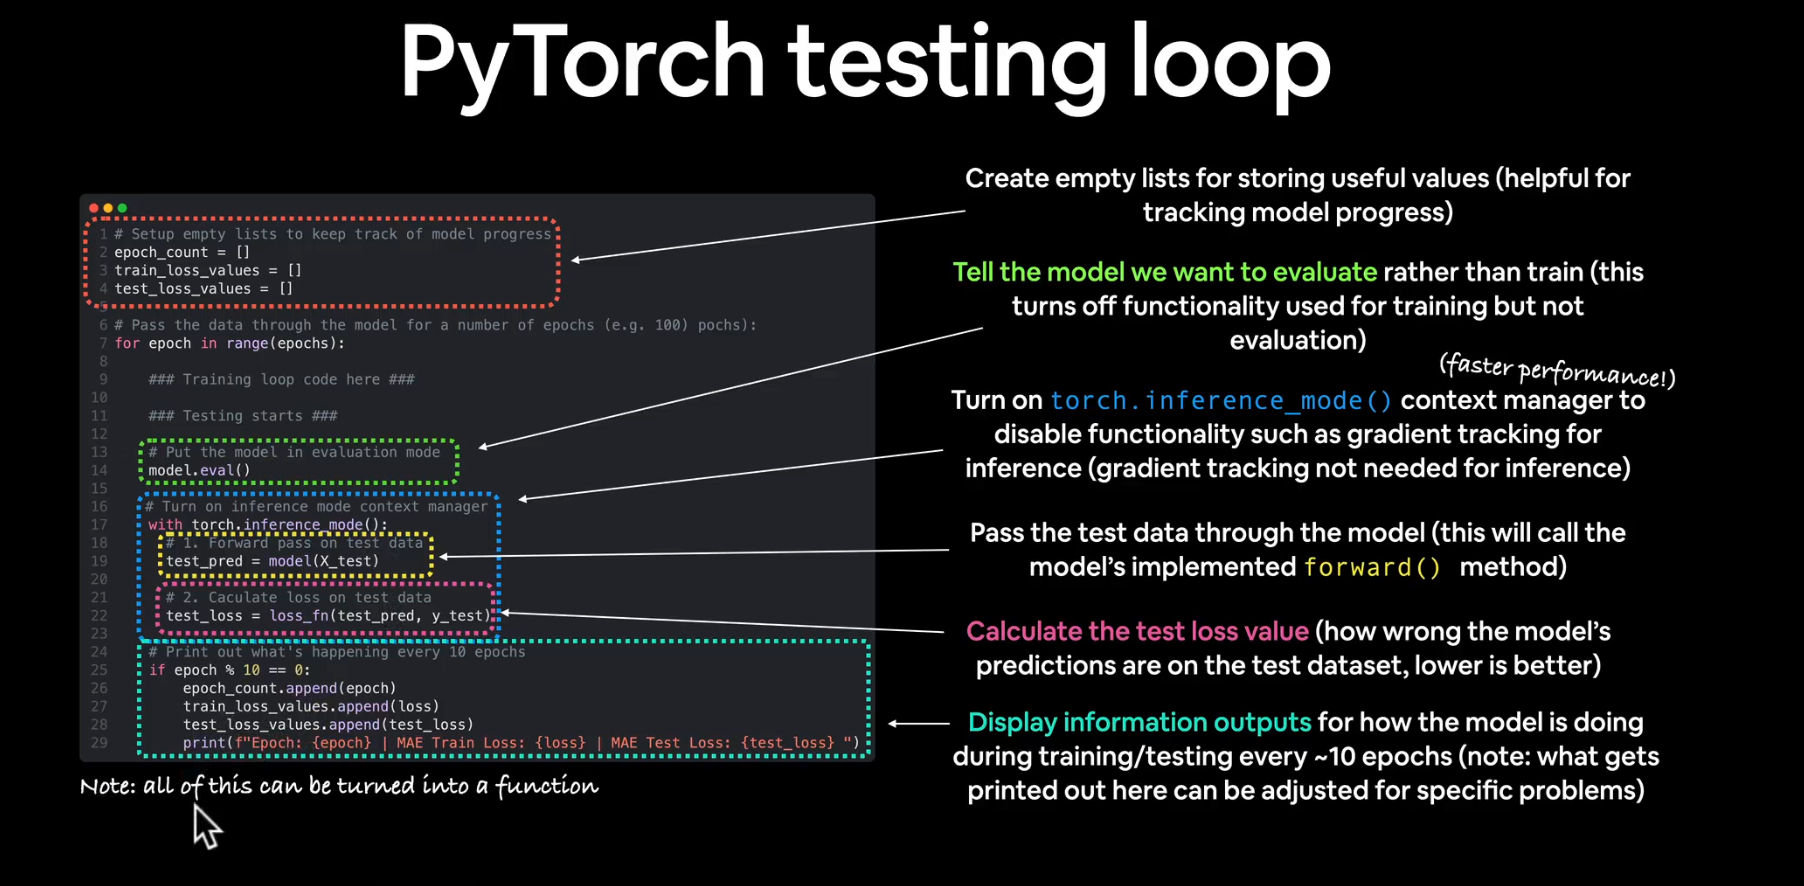